# Day Two: Visualizing Networks

Now we've learned how networks are represented, let's get a jump start on learning how to visualize networks in Python! 

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

Last night you all had to take a survey about who in the class you had met before! Using the same technique as we talked about in the previous notebook, I translated this data to make an adjacency matrix. I have it saved as `CodeGoodNetwork.csv`

I also used the data from this survey to make more files which will be helpful both today and later on. These files are:
* `ID_key.csv`. This file tells us which rows/columns correspond to which person in the class. Just as in the survey you all saw last night, the `ID_key.csv` file is arranged alphabetically by first name and includes the names of everybody who _enrolled_ in the class.
* `Who_Responded.csv`. Not everybody in the `ID_key.csv` file (and therefore not everybody included in the network!) responded to the survey! This is actually extremely common in real network studies, and there are some super cool methods for handling this "missing data". The `Who_Responded.csv` file tells us whether or not each ID responded to the survey. For example, if person with ID `12` didn't respond, the 13th entry in the file would be a `0`. If that person _did_ respond, the corresponding entry would be a `1`.

### Read in Network Data
Let's start by creating a `numpy` array to represent the adjacency matrix contained in the `CodeGoodNetwork.csv` file. 

In [3]:
folder = ""
file = "CodeGoodNetwork"
ext = ".csv"
CG_Adjacency = np.genfromtxt(folder+file+ext, dtype=int, delimiter=',', skip_header=False)

Now we'll load the extra data, too! 

In [4]:
folder = ""
file = "ID_key"
ext = ".csv"
ID_keys = np.genfromtxt(folder+file+ext, dtype=str, delimiter=',', skip_header=False)

folder = ""
file = "Who_Responded"
ext = ".csv"
who_responded = np.genfromtxt(folder+file+ext, dtype=int, delimiter=',', skip_header=False)
num_responses = sum(who_responded)

In [5]:
print(ID_keys[2])

Alex Bonilla


### Create Network Object

In order to use the amazing tools in the `networkx` library, we first have to create a network object. There's a lot going on behind the scenes of this function, but basically it's defining the _nodes_ and _edges_ given by the adjacency matrix.

There _are_ other ways to define a network using `networkx`. However, since it's common to receive network data through an adjacency matrix in a `.csv` file, I've found this method for defining a network to be most useful.

In [6]:
CG_Network = nx.from_numpy_matrix(CG_Adjacency)

### Determine the positioning of nodes

The function `nx.spring_layout()` determines an optimal positioning of the nodes in the network through a physical simulation. The function treats edges as springs holding the nodes together, and treats the nodes as repelling objects. Simulation continues until the positions are close to an equilibrium.

The parameter `k` tells the function the optimal distance between nodes. We'll see below that for this graph we want to set `k` to be bigger, whereas for other graphs, a smaller `k` is sufficient.

It's helpful to _save_ the positioning of the graph so that it's easy to compare the same graph after nodes have been colored. We'll see that if we don't do this, the graph changes positions with each `nx.spring_layout()` simulation.

In [7]:
pos = nx.spring_layout(CG_Network, k=0.5)

### Plot the network
The function `nx.draw()` plots our network given certain parameters. The first parameter is the network object, the second parameter is the given position of each node.

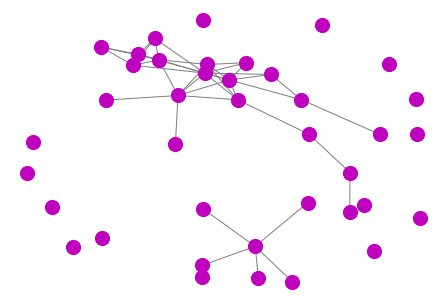

In [8]:
nx.draw(CG_Network, pos, node_color='m', node_size=200, edge_color='grey', with_labels=False)

### Change parameters of the plot
Try different colors for the `node_color` parameter to see what colors you can use. Google "matplotlib colors" to see what options you have! For example, `c` is a beautiful cyan color and `k` is black, whereas `r` is red!

The `node_size` parameter will change the size of your nodes!

Change the color of your edges with the `edge_color` parameter

Change the `with_labels` parameter to view labels.

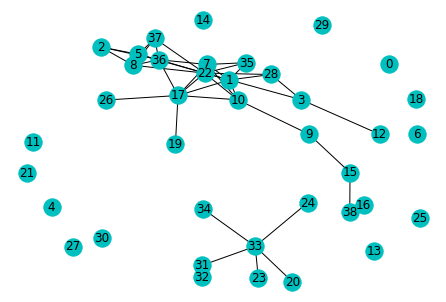

In [9]:
nx.draw(CG_Network, pos, node_color='c', node_size=300, edge_color='black', with_labels=True)

In [10]:
ID_keys[24]

'Pallavi Gadre'

### Change colors of just a few nodes
There are `len(CG_Adjacency)` nodes in the network, so we'll make a list of one color, and then change some of the values corresponding to the nodes we want to change!

To do so, we have to make a list the length of the number of nodes in the graph/network. Then we specify the color of each node based on the color in the list. 

In [11]:
len(CG_Adjacency)

39

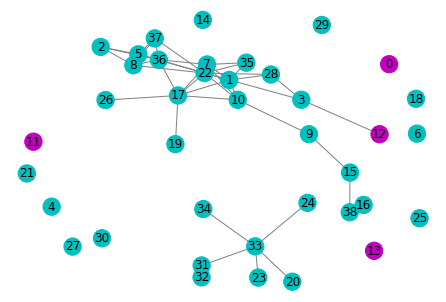

In [12]:
colors = ['c'] * len(CG_Adjacency)
colors[0] = 'm'
colors[11:14] = ['m']*3
nx.draw(CG_Network, pos, node_color=colors, node_size=300, edge_color='grey', with_labels=True)

### Making specific nodes different colors
In the below code we'll indicate the nodes corresponding to enrolled people who didn't fill out the survey by coloring them grey. 

If you have a better way of doing this, please let me know!!

In [13]:
ID_responded = np.where(who_responded == 1)[0]
print(ID_responded)

[ 1  3  5  7  8  9 10 15 17 18 20 22 23 24 27 31 33 34 35 36 37 38]


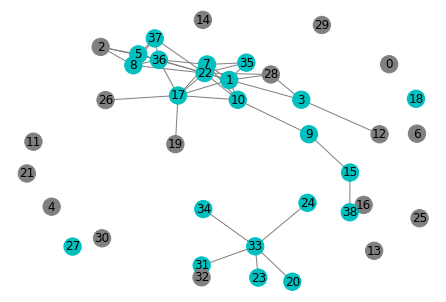

In [14]:
colors = ['c'] * len(CG_Adjacency)

ID_responded = np.where(who_responded == 1)[0]

for i in range(len(CG_Adjacency)):
    if i not in ID_responded:
        colors[i] = 'grey'
        
nx.draw(CG_Network, pos, node_color=colors, node_size=300, edge_color='grey', with_labels=True)

## That's all for today! 
Let me know how today's lecture went by filling out this poll
https://pollev.com/izabelaguiar204